In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<AxesSubplot:>

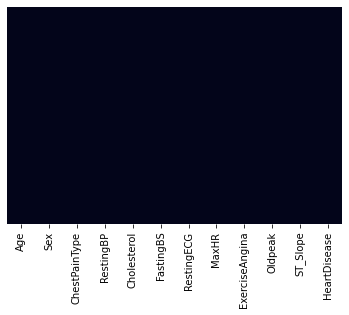

In [3]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False)

In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
#Function to reteive categorical columns

In [7]:
def get_cat_col(df):
    main_col = df.columns
    num_col = df._get_numeric_data().columns
    cat_col = list(set(main_col) - set(num_col))
    return cat_col

In [8]:
get_cat_col(df)

['ChestPainType', 'Sex', 'ST_Slope', 'RestingECG', 'ExerciseAngina']

<AxesSubplot:>

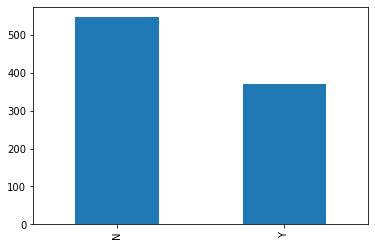

In [9]:
df.ExerciseAngina.value_counts().plot(kind='bar')

<AxesSubplot:>

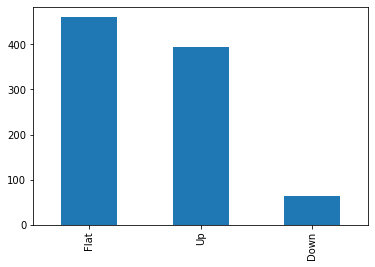

In [10]:
df.ST_Slope.value_counts().plot(kind='bar')

<AxesSubplot:>

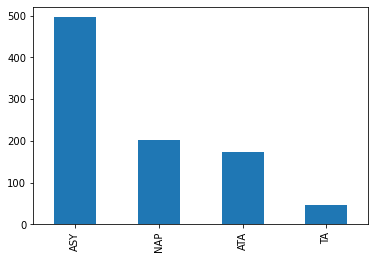

In [11]:
df.ChestPainType.value_counts().plot(kind = 'bar')

<AxesSubplot:>

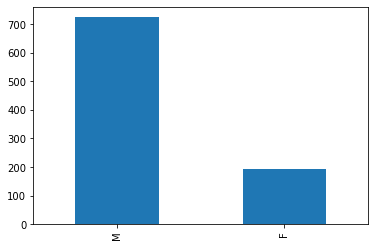

In [12]:
df['Sex'].value_counts().plot(kind = 'bar')

In [13]:
def category_onehot_multcols(multcolumns):
    df_final=df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(df[fields],drop_first=False)
        print(df1.columns)
        df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([df,df_final],axis=1)
        
    return df_final

In [14]:
new_df = category_onehot_multcols(get_cat_col(df))

ChestPainType
Index(['ASY', 'ATA', 'NAP', 'TA'], dtype='object')
Sex
Index(['F', 'M'], dtype='object')
ST_Slope
Index(['Down', 'Flat', 'Up'], dtype='object')
RestingECG
Index(['LVH', 'Normal', 'ST'], dtype='object')
ExerciseAngina
Index(['N', 'Y'], dtype='object')


In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           918 non-null    int64  
 1   RestingBP     918 non-null    int64  
 2   Cholesterol   918 non-null    int64  
 3   FastingBS     918 non-null    int64  
 4   MaxHR         918 non-null    int64  
 5   Oldpeak       918 non-null    float64
 6   HeartDisease  918 non-null    int64  
 7   ASY           918 non-null    uint8  
 8   ATA           918 non-null    uint8  
 9   NAP           918 non-null    uint8  
 10  TA            918 non-null    uint8  
 11  F             918 non-null    uint8  
 12  M             918 non-null    uint8  
 13  Down          918 non-null    uint8  
 14  Flat          918 non-null    uint8  
 15  Up            918 non-null    uint8  
 16  LVH           918 non-null    uint8  
 17  Normal        918 non-null    uint8  
 18  ST            918 non-null    

In [16]:
new_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ASY,ATA,NAP,...,F,M,Down,Flat,Up,LVH,Normal,ST,N,Y
0,40,140,289,0,172,0.0,0,0,1,0,...,0,1,0,0,1,0,1,0,1,0
1,49,160,180,0,156,1.0,1,0,0,1,...,1,0,0,1,0,0,1,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,1,0,0,1,0,0,1,1,0
3,48,138,214,0,108,1.5,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
4,54,150,195,0,122,0.0,0,0,0,1,...,0,1,0,0,1,0,1,0,1,0


In [17]:
new_df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ASY,ATA,NAP,...,F,M,Down,Flat,Up,LVH,Normal,ST,N,Y
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,0.166607,-0.218165,-0.011335,...,-0.055750,0.055750,0.138397,0.185568,-0.258067,0.145727,-0.230566,0.136798,-0.215793,0.215793
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,0.048824,-0.046153,-0.041348,...,-0.005133,0.005133,-0.007912,0.099207,-0.096146,0.053166,-0.116851,0.090447,-0.155101,0.155101
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,-0.120531,0.150954,-0.006634,...,0.200092,-0.200092,-0.083371,-0.050953,0.094027,0.177077,-0.038470,-0.133106,0.034166,-0.034166
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,0.131176,-0.140514,-0.039249,...,-0.120076,0.120076,0.105102,0.107006,-0.161730,-0.011656,-0.093028,0.127110,-0.060451,0.060451
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,-0.354963,0.253735,0.134580,...,0.189186,-0.189186,-0.073316,-0.342581,0.383397,0.125793,0.023801,-0.157879,0.370425,-0.370425
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,0.280026,-0.262124,-0.106212,...,-0.105734,0.105734,0.322130,0.283295,-0.450577,0.086794,-0.116719,0.055958,-0.408752,0.408752
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,0.516716,-0.401924,-0.212964,...,-0.305445,0.305445,0.122527,0.554134,-0.622164,0.010670,-0.091580,0.102527,-0.494282,0.494282
ASY,0.166607,0.048824,-0.120531,0.131176,-0.354963,0.280026,0.516716,1.000000,-0.522432,-0.577670,...,-0.183876,0.183876,0.103407,0.303645,-0.359443,0.002289,-0.063606,0.076438,-0.430034,0.430034
ATA,-0.218165,-0.046153,0.150954,-0.140514,0.253735,-0.262124,-0.401924,-0.522432,1.000000,-0.256767,...,0.161522,-0.161522,-0.097754,-0.304667,0.357588,-0.085791,0.107941,-0.046111,0.300365,-0.300365
NAP,-0.011335,-0.041348,-0.006634,-0.039249,0.134580,-0.106212,-0.212964,-0.577670,-0.256767,1.000000,...,0.066486,-0.066486,-0.040816,-0.072031,0.093583,0.035299,0.005010,-0.042236,0.166030,-0.166030


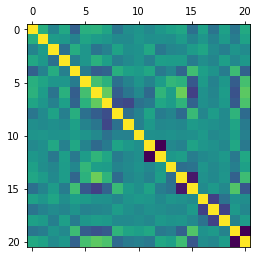

In [18]:
plt.matshow(new_df.corr())

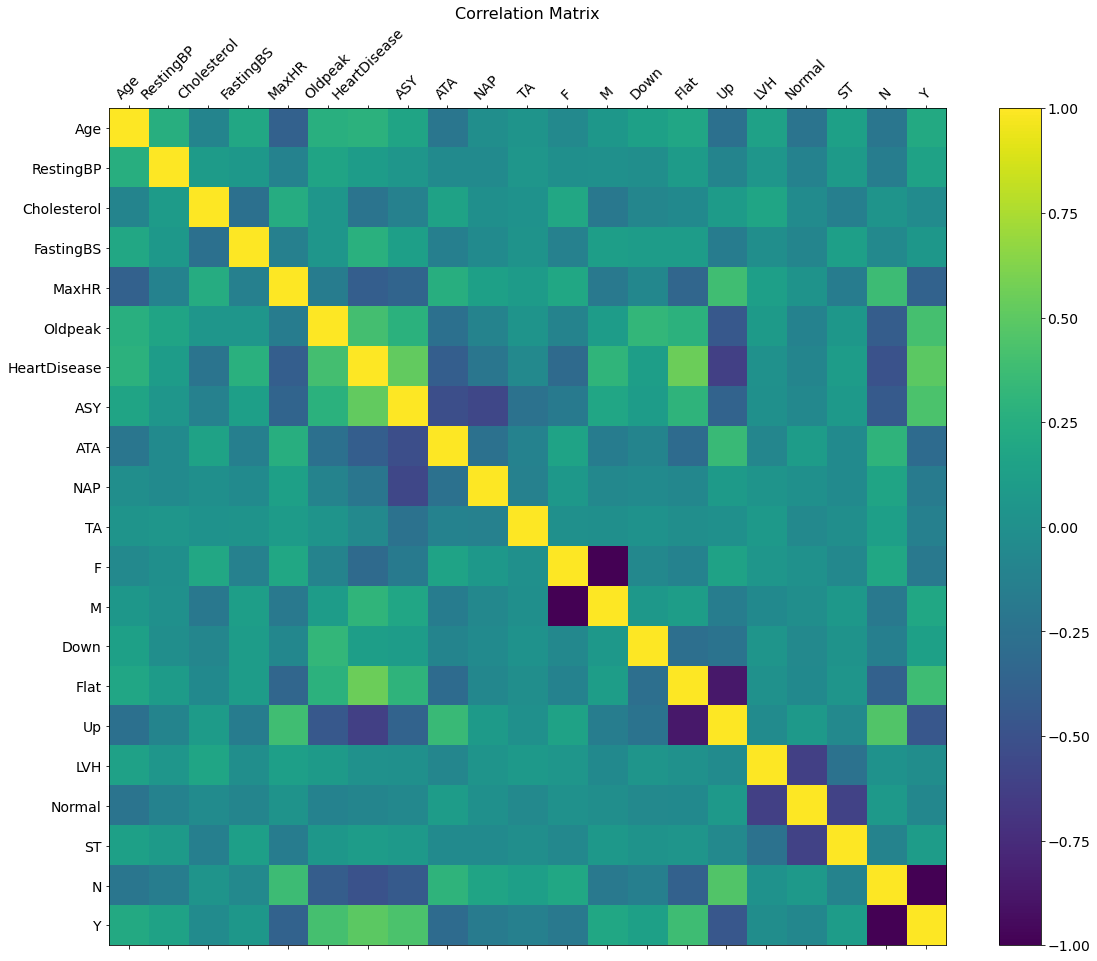

In [19]:
f = plt.figure(figsize=(19, 15))
plt.matshow(new_df.corr(), fignum=f.number)
plt.xticks(range(new_df.shape[1]), new_df.columns, fontsize=14, rotation=45)
plt.yticks(range(new_df.shape[1]), new_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [20]:
#cheking outliers

In [21]:
new_df.shape

(918, 21)

In [22]:
new_df = new_df[(np.abs(stats.zscore(new_df)) < 3).all(axis=1)]

In [23]:
new_df.shape

(800, 21)

In [24]:
#We can see there is some certain correlation between the categorical values

In [25]:
y = new_df.HeartDisease
y

0      0
1      1
2      0
3      1
4      0
      ..
912    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 800, dtype: int64

<AxesSubplot:>

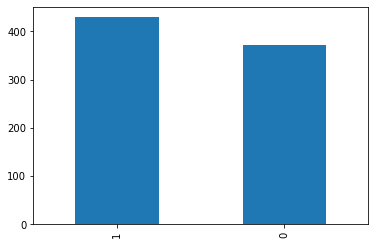

In [26]:
y.value_counts().plot(kind = 'bar')

In [27]:
new_df.drop(['HeartDisease'],axis=1,inplace = True)
X = new_df.copy()
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ASY,ATA,NAP,TA,F,M,Down,Flat,Up,LVH,Normal,ST,N,Y
0,40,140,289,0,172,0.0,0,1,0,0,0,1,0,0,1,0,1,0,1,0
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
2,37,130,283,0,98,0.0,0,1,0,0,0,1,0,0,1,0,0,1,1,0
3,48,138,214,0,108,1.5,1,0,0,0,1,0,0,1,0,0,1,0,0,1
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,1,0


In [28]:
l = X.columns
l

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'ASY', 'ATA', 'NAP', 'TA', 'F', 'M', 'Down', 'Flat', 'Up', 'LVH',
       'Normal', 'ST', 'N', 'Y'],
      dtype='object')

In [29]:
#Feature importance

In [30]:
#Using Random forests

In [31]:
mod = RandomForestRegressor()

In [32]:
mod.fit(X,y)

RandomForestRegressor()

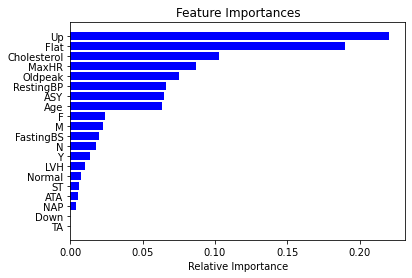

In [33]:
importances = mod.feature_importances_
indices = np.argsort(importances)

features = l
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [34]:
indices[::-1][0:7]

array([14, 13,  2,  4,  5,  1,  6], dtype=int64)

In [35]:
#only selecting topmost features

In [36]:
l = new_df.columns
#indices[::-1][0:8]
fc = l[indices[::-1][0:8]]
new_df = new_df[fc]
new_df.info()
#print(fc)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 917
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Up           800 non-null    uint8  
 1   Flat         800 non-null    uint8  
 2   Cholesterol  800 non-null    int64  
 3   MaxHR        800 non-null    int64  
 4   Oldpeak      800 non-null    float64
 5   RestingBP    800 non-null    int64  
 6   ASY          800 non-null    uint8  
 7   Age          800 non-null    int64  
dtypes: float64(1), int64(4), uint8(3)
memory usage: 39.8 KB


In [37]:
X = new_df.copy()
X.head()

,Up,Flat,Cholesterol,MaxHR,Oldpeak,RestingBP,ASY,Age
0,1,0,289,172,0.0,140,0,40
1,0,1,180,156,1.0,160,0,49
2,1,0,283,98,0.0,130,0,37
3,0,1,214,108,1.5,138,1,48
4,1,0,195,122,0.0,150,0,54


In [38]:
#scaling the data

In [39]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [40]:
X

array([[1.        , 0.        , 0.55791506, ..., 0.51612903, 0.        ,
        0.24489796],
       [0.        , 1.        , 0.34749035, ..., 0.7311828 , 0.        ,
        0.42857143],
       [1.        , 0.        , 0.54633205, ..., 0.40860215, 0.        ,
        0.18367347],
       ...,
       [0.        , 1.        , 0.25289575, ..., 0.40860215, 1.        ,
        0.59183673],
       [0.        , 1.        , 0.45559846, ..., 0.40860215, 0.        ,
        0.59183673],
       [1.        , 0.        , 0.33783784, ..., 0.49462366, 0.        ,
        0.20408163]])

In [41]:
#splitting train and validation data

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8)

In [43]:
print(X_train.shape,y_train.shape,X_test.shape)

(640, 8) (640,) (160, 8)


In [44]:
#Model selection

In [58]:
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [46]:
mod = SVC()
mod.fit(X_train,y_train)

SVC()

In [47]:
spred = mod.predict(X_test)
spred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0], dtype=int64)

In [48]:
print(classification_report(spred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        71
           1       0.92      0.89      0.90        89

    accuracy                           0.89       160
   macro avg       0.89      0.89      0.89       160
weighted avg       0.89      0.89      0.89       160



In [49]:
#Hyperparameter tuning

In [59]:
param_grid = {'C': [1, 10, 20, 30, 50, 100, 200, 350, 500, 750, 1000],
              'gamma': [0.2, 0.24, 0.28, 0.32, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.5],
              'kernel': ['rbf']}

In [60]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1)

In [61]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 121 candidates, totalling 605 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 20, 30, 50, 100, 200, 350, 500, 750,
                               1000],
                         'gamma': [0.2, 0.24, 0.28, 0.32, 0.36, 0.38, 0.4, 0.42,
                                   0.44, 0.46, 0.5],
                         'kernel': ['rbf']},
             verbose=3)

In [62]:
print(grid.best_estimator_)

SVC(C=20, gamma=0.36)


In [63]:
gpred = grid.predict(X_test)
gpred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0], dtype=int64)

In [64]:
print(classification_report(gpred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        73
           1       0.90      0.89      0.89        87

    accuracy                           0.88       160
   macro avg       0.88      0.88      0.88       160
weighted avg       0.88      0.88      0.88       160

